In [7]:
# Panda for reading in csv file
import pandas as pd
# plt for plotting graphs
import matplotlib.pyplot as plt
# Linear regression models
from sklearn.linear_model import LinearRegression
# Neighbour regressor model
from sklearn.neighbors import KNeighborsRegressor
# Neural Network model
from sklearn.neural_network import MLPRegressor
# GridSearch for hyperparameter turning
from sklearn.model_selection import GridSearchCV
# function for splitting training and testing data
from sklearn.model_selection import train_test_split
# error scores to compare different regression algorithms
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Setup DataFrame
df = pd.read_csv('data/DataEnergyClean.csv')

In [9]:
# Setting up our X for the multidimensional input
X = df.drop(columns='Appliances')
# Setting up the value we want to predict (Appliances, energy use in Wh)
y = df['Appliances']

# Setup the training data (X_train, y_train) which will use 80% of the dataset, 
# and the test data (X_test, y_test) which will use the remaining 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# DO NOT RUN THIS CELL

# Parameter grid with hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 32, 16), (64,)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'early_stopping': [True, False],
    'alpha': [0.0001, 0.001, 0.01]
}

# Specify solver directly in MLPRegressor
neural_network1 = MLPRegressor(
    solver='adam',
    **param_grid  # Include other hyperparameters from param_grid
)

# Grid search to tune hyperparameters
grid_search = GridSearchCV(neural_network1, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Save and print best hyperparameters
best_params = grid_search.best_params_

print(grid_search.best_params_)

# Train final model with best hyperparameters from grid search
final_neural_network = MLPRegressor(
    **best_params,  
)
final_neural_network.fit(X_train, y_train)


In [10]:
# List of regression models to apply to dataset
models = {"Linear Regression": LinearRegression(n_jobs=-1),
          "K-NN": KNeighborsRegressor(algorithm='auto', weights='uniform', n_jobs=-1),
          "Neural Network": MLPRegressor(activation='relu', alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, solver='adam')}


In [12]:
# Checking each model
model_mse_score = []
model_mae_score = []
model_r2_score = []

for model in models:
    print(f"Executing {model}...")

    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_mse_score.append(mse)
    model_mae_score.append(mae)
    model_r2_score.append(r2)

Executing Linear Regression...
Executing K-NN...


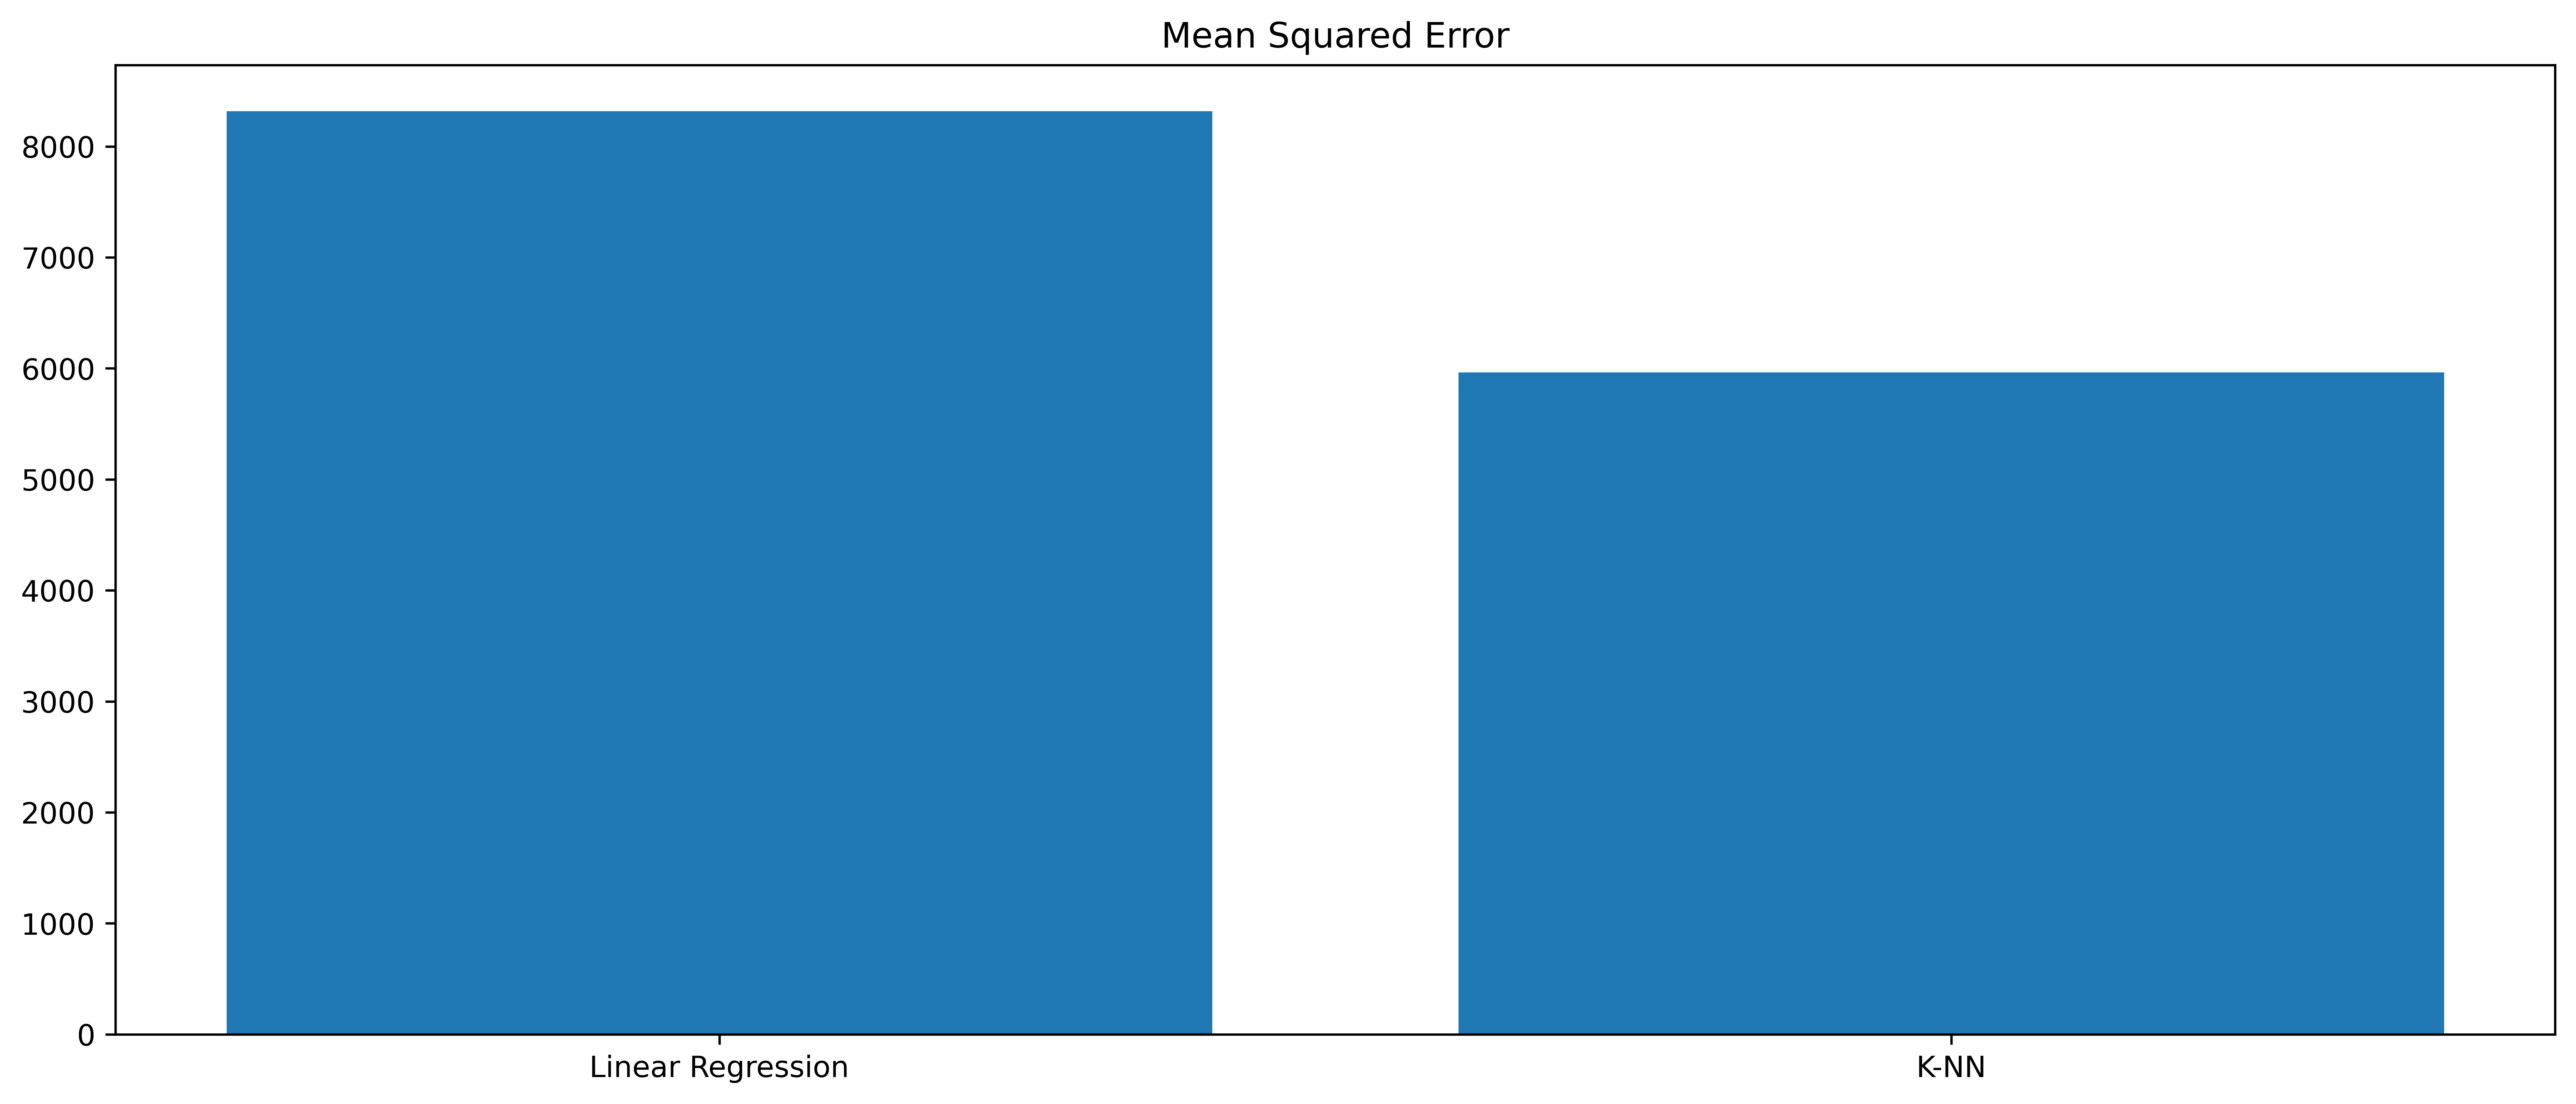

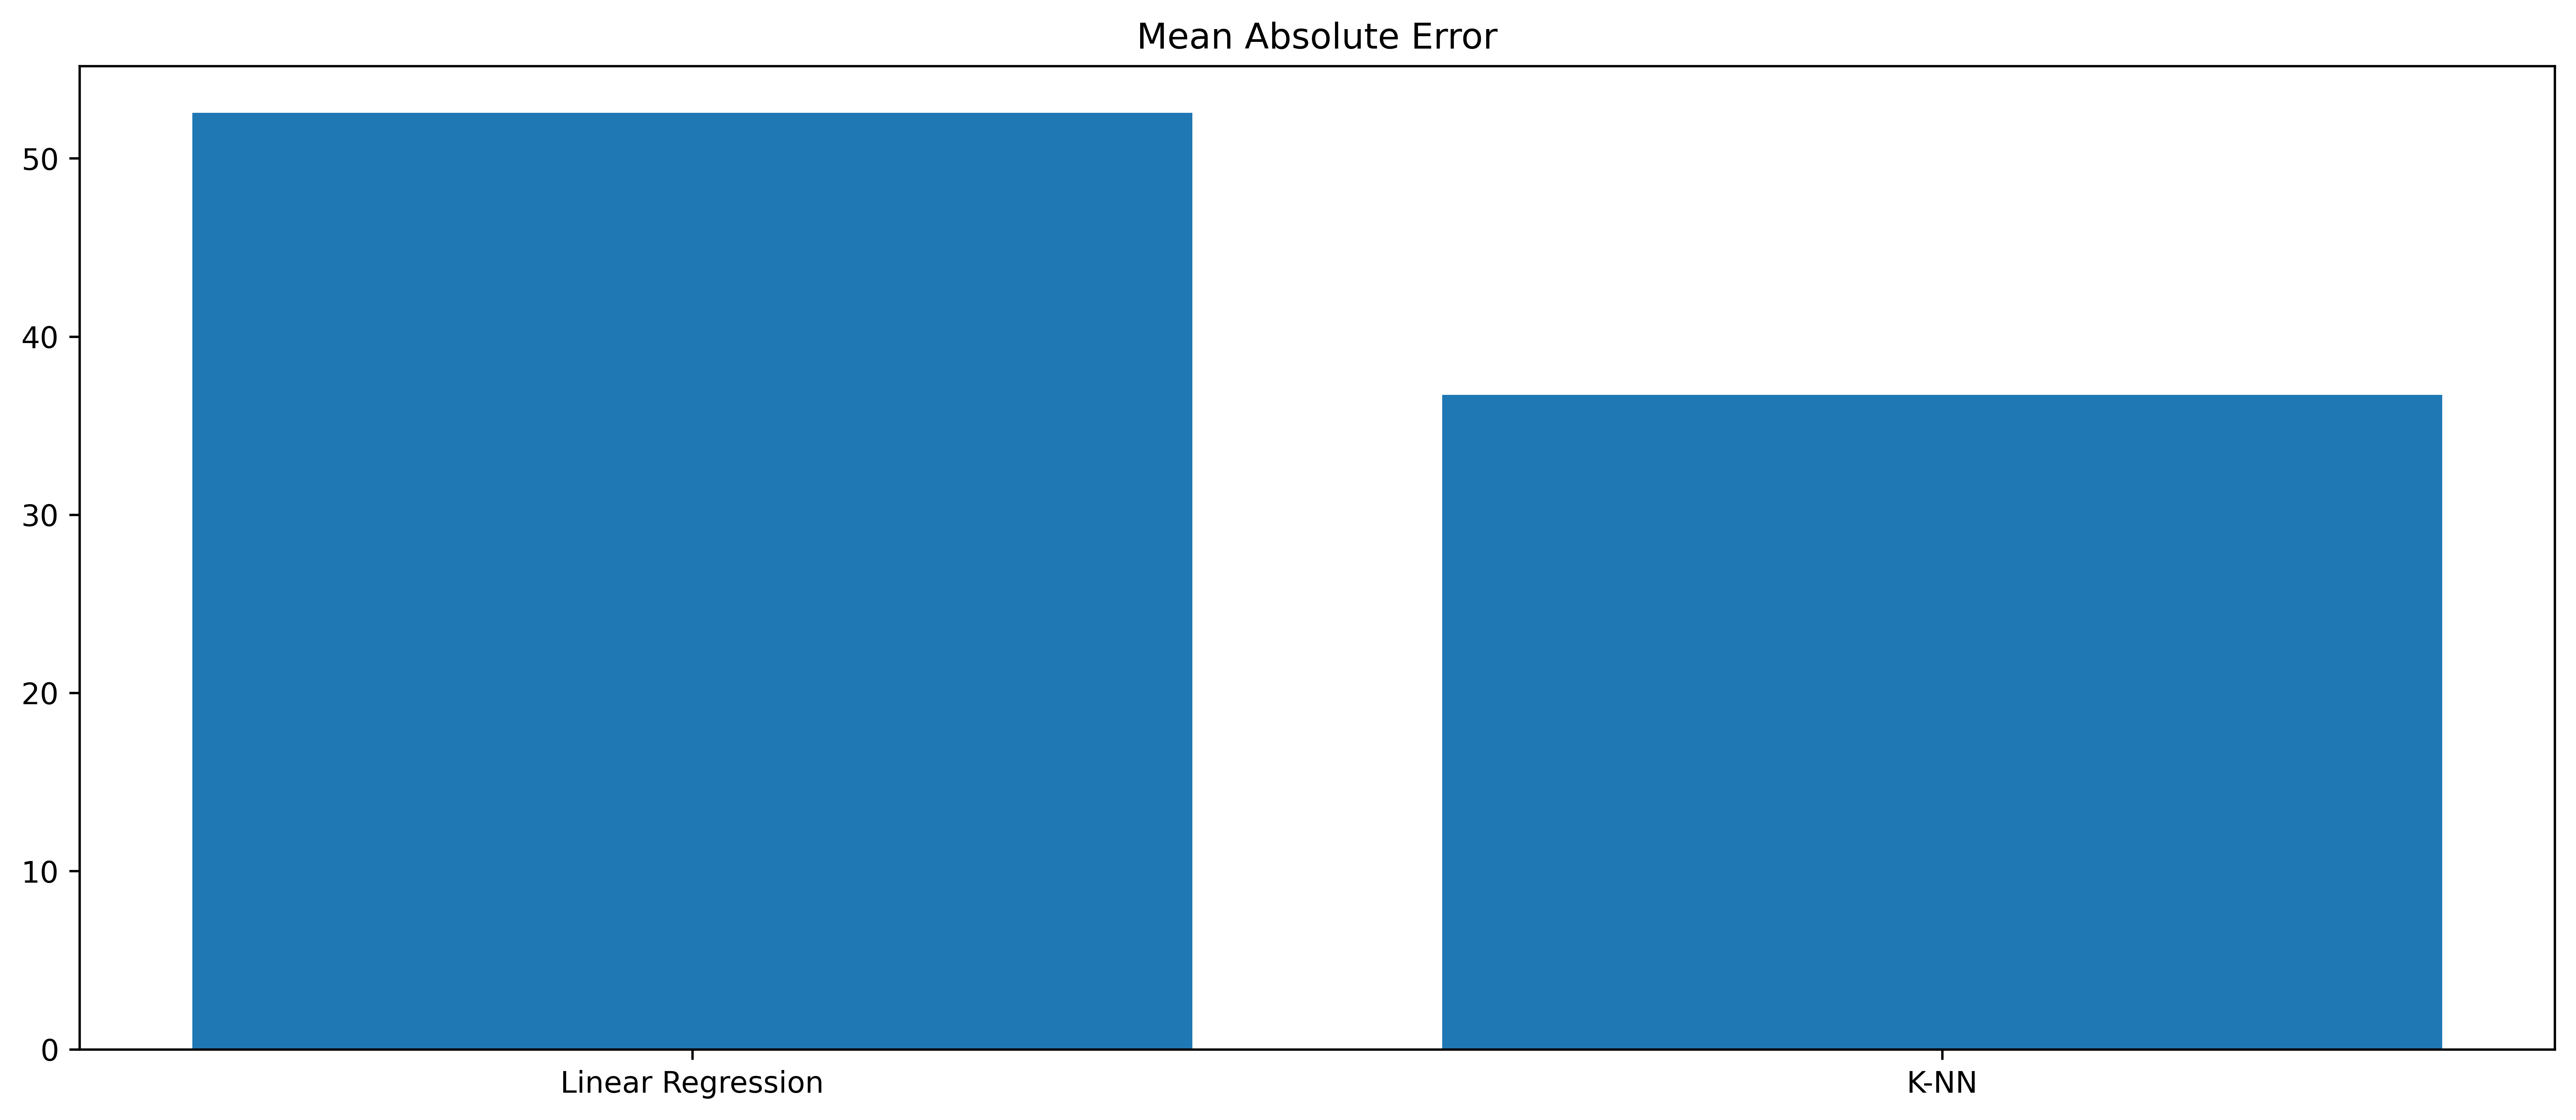

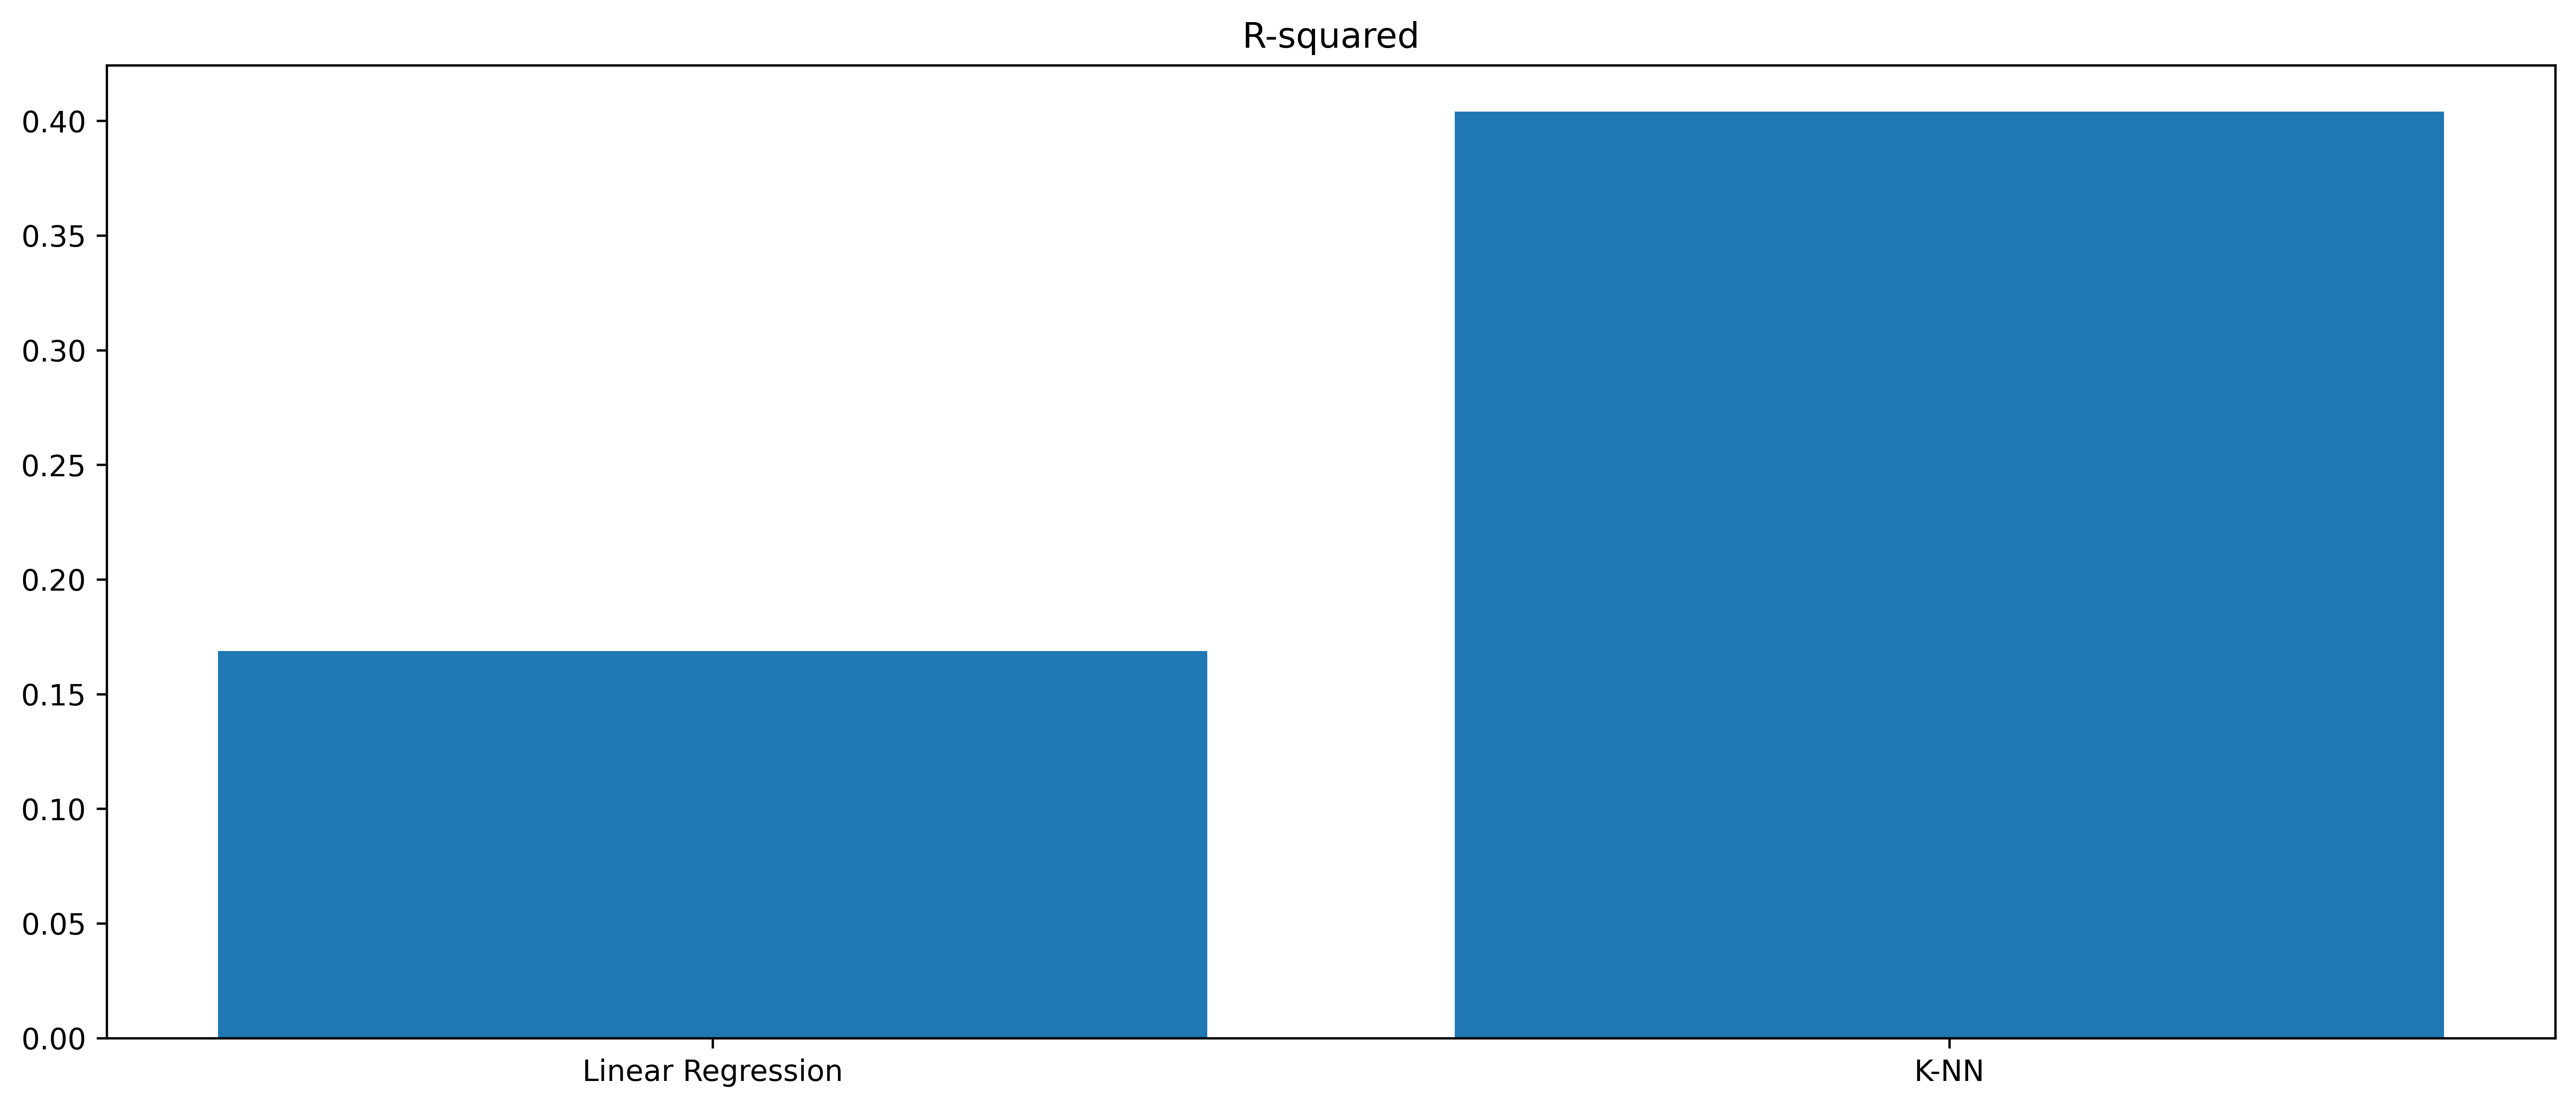

In [14]:
# Show how models measure up against each other
fig1, ax1 = plt.subplots(figsize=(15, 6), dpi=600)
ax1.bar(models.keys(), model_mse_score)
ax1.set_title('Mean Squared Error')
plt.show()

fig2, ax2 = plt.subplots(figsize=(15, 6), dpi=600)
ax2.bar(models.keys(), model_mae_score)
ax2.set_title('Mean Absolute Error')
plt.show()

fig3, ax3 = plt.subplots(figsize=(15, 6), dpi=600)
ax3.bar(models.keys(), model_r2_score)
ax3.set_title('R-squared')
plt.show()